<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </font> </h5>

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

### Hesam Hosseini
### 400101034

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Code cell
# Load the dataset
df = pd.read_csv('arac.csv',sep=';')
df.tail()

,Year,All,Car,Minibus,Bus,SmallTruck,Truck,Motorcycle,SpecialVehicles,Machinery,Tractor
45,2011,16089528,8113111,389435,219906,2611104,728458,2527190,34116,NaN,1466208.0
46,2012,17033413,8648875,396119,235949,2794606,751650,2657722,33071,NaN,1515421.0
47,2013,17939447,9283923,421848,219885,2933050,755950,2722826,36148,NaN,1565817.0
48,2014,18828721,9857915,427264,211200,3062479,773728,2828466,40731,NaN,1626938.0
49,2015,19882069,10509258,446822,216566,3235304,802615,2938821,45138,NaN,1687545.0


In [13]:
# Selecting relevant columns
columns_of_interest = ['Year', 'Car', 'Bus']
data = df[columns_of_interest]

# Extracting features and target
X = (data['Year']-1965).values.reshape(-1, 1)
y_car = data['Car'].values
y_bus = data['Bus'].values


results = {}

# Fitting polynomial of degree 3, 4, and 5 to 'Car' and 'Bus' separately
for degree in range(3, 6):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)


    model_car = LinearRegression().fit(X_poly, y_car)
    model_bus = LinearRegression().fit(X_poly, y_bus)

    # Predict for years 2016-2020
    # X_pred = np.array([[2016-1966], [2017-1966], [2018-1966], [2019-1966], [2020-1966]])
    X_pred = np.array(range(2020-1965)).reshape(-1,1)
    X_pred_poly = poly.transform(X_pred)
    y_car_pred = model_car.predict(X_pred_poly)
    y_bus_pred = model_bus.predict(X_pred_poly)

    results[degree] = {'car': y_car_pred, 'bus': y_bus_pred}


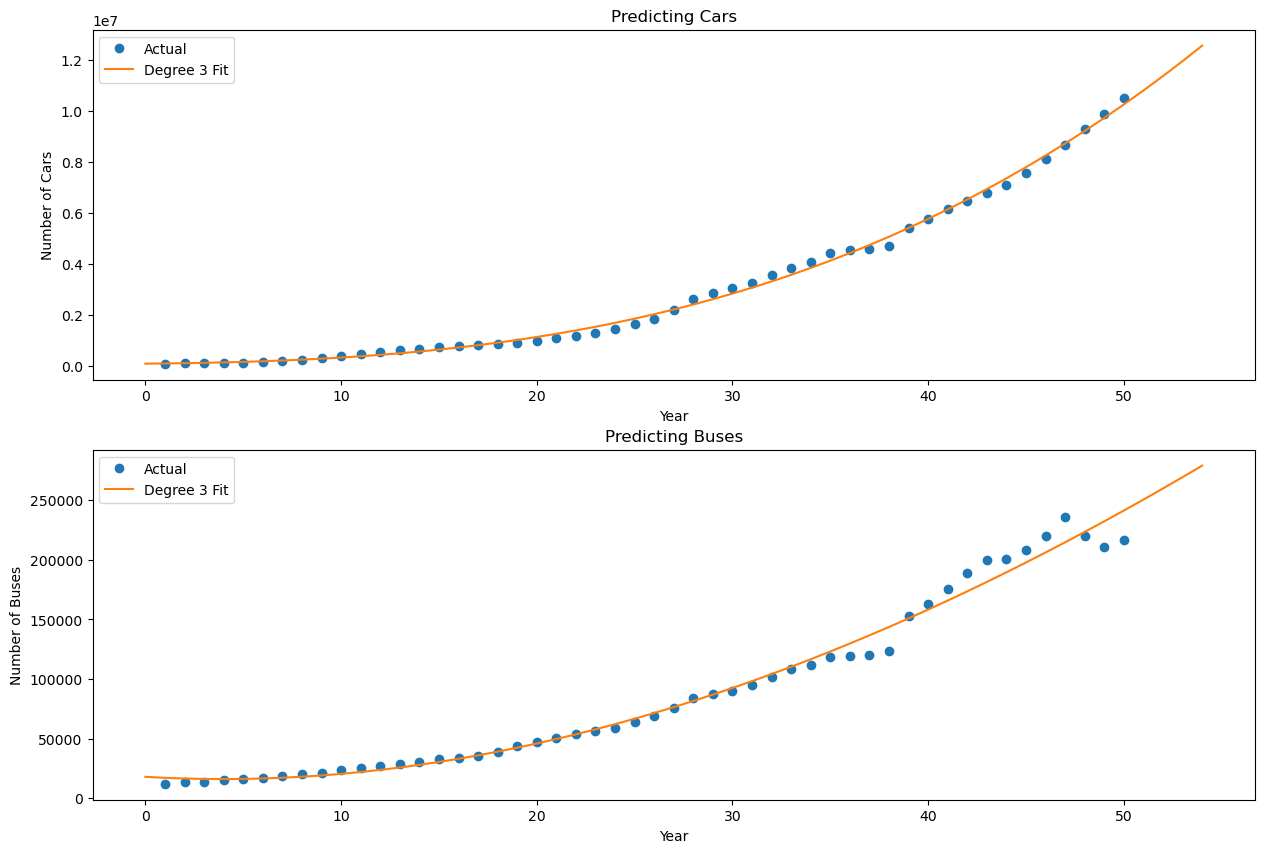

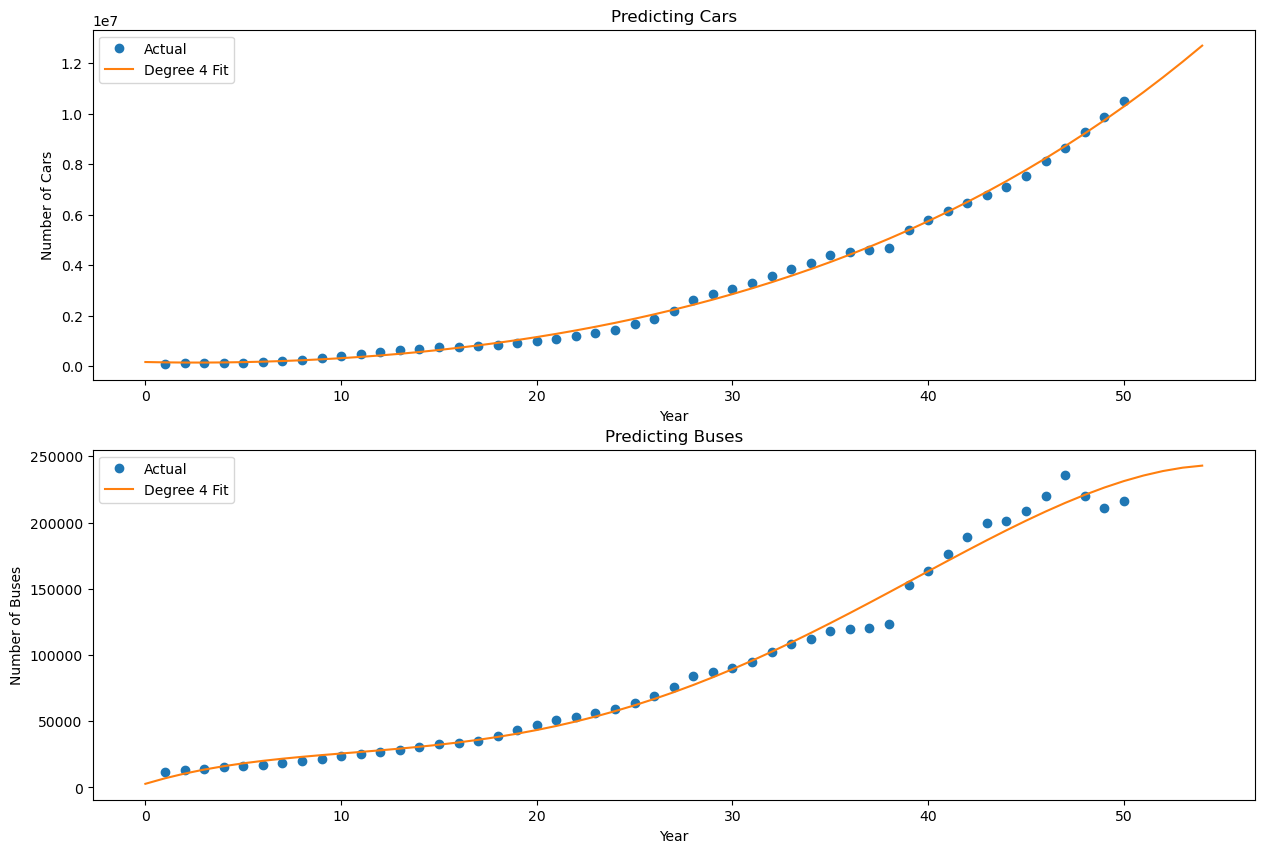

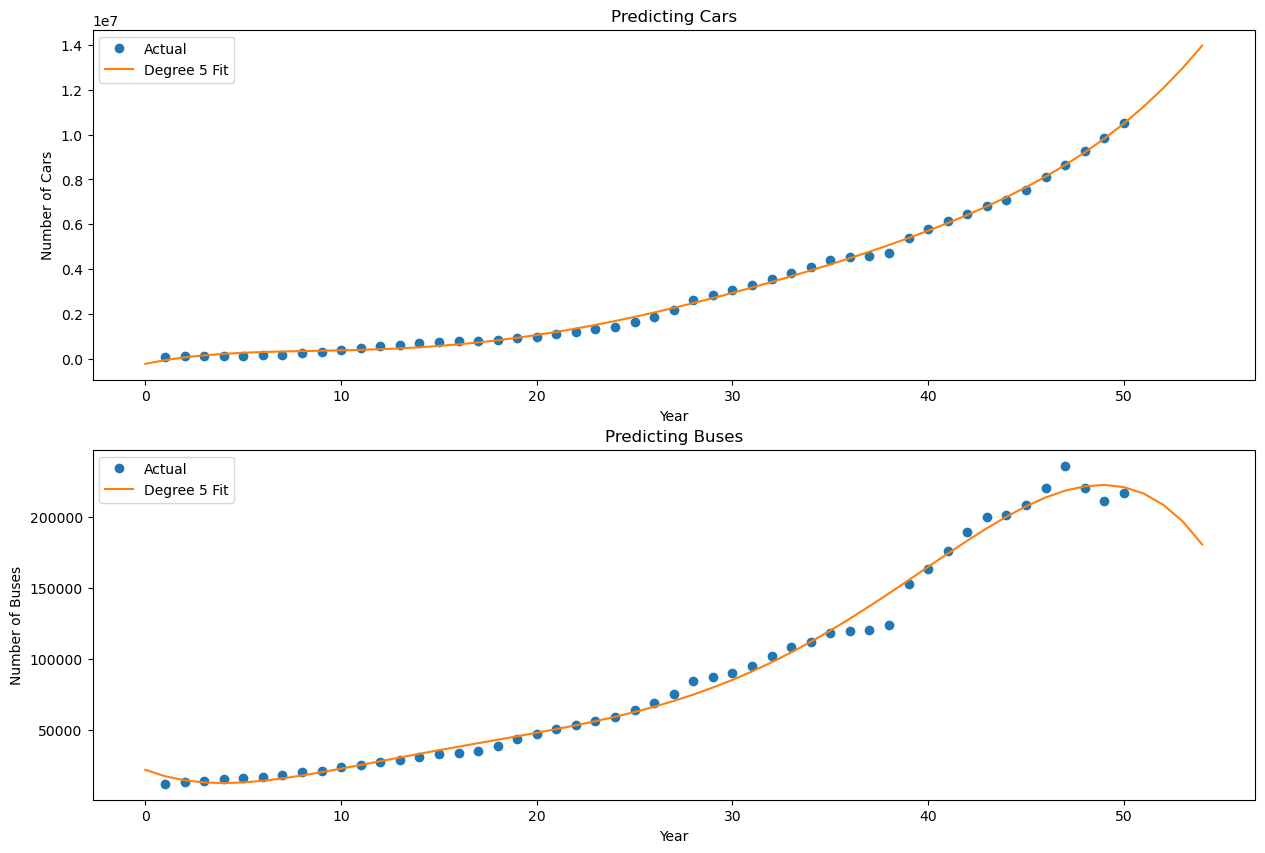

In [14]:
# Plot results for each degree
for degree in results:
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 1, 1)
    plt.plot(X, y_car, 'o', label='Actual')
    plt.plot(X_pred, results[degree]['car'], label=f'Degree {degree} Fit')
    plt.title('Predicting Cars')
    plt.xlabel('Year')
    plt.ylabel('Number of Cars')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(X, y_bus, 'o', label='Actual')
    plt.plot(X_pred, results[degree]['bus'], label=f'Degree {degree} Fit')
    plt.title('Predicting Buses')
    plt.xlabel('Year')
    plt.ylabel('Number of Buses')
    plt.legend()

    plt.show()


## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

In [15]:
def load_data(file_name):
    df = pd.read_csv(file_name,header=None)
    X = df.to_numpy()
    return X
X = load_data('Image.csv')
X.shape

(600, 2)

- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [16]:
def kmeans(X, K, max_iters=100):
    n, d = X.shape

    # Initialize cluster centroids randomly
    centroids_idx = np.random.choice(n, K, replace=False)
    M = X[centroids_idx, :]

    for i in range(max_iters):
        dist_matrix = np.sum((X[:, np.newaxis] - M) ** 2, axis=2)  # Squared distances
        U = np.argmin(dist_matrix, axis=1)

        # Update cluster centroids as the mean of the assigned data points
        M_new = np.array([np.mean(X[U == k], axis=0) for k in range(K)])


        if np.array_equal(M, M_new):
            break

        M = M_new

    return M, U


- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

In [17]:
# import matplotlib.pyplot as plt

def plot_clusters(X, M, U):
    K = M.shape[0]

    plt.figure()
    for k in range(K):
        plt.scatter(X[U == k, 0], X[U == k, 1], label=f'Cluster {k+1}')
        plt.scatter(M[k, 0], M[k, 1], c='red', marker='o', label=f'Centroid {k+1}')
        for i in range(len(M)):
            circle = plt.Circle((M[i, 0], M[i, 1]), radius=0.5, color='red', fill=False)
            plt.gcf().gca().add_artist(circle)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('K-means Clustering')
    plt.legend()
    plt.show()


**<font color="red"> Don't edit the code in the following cell!</font>**

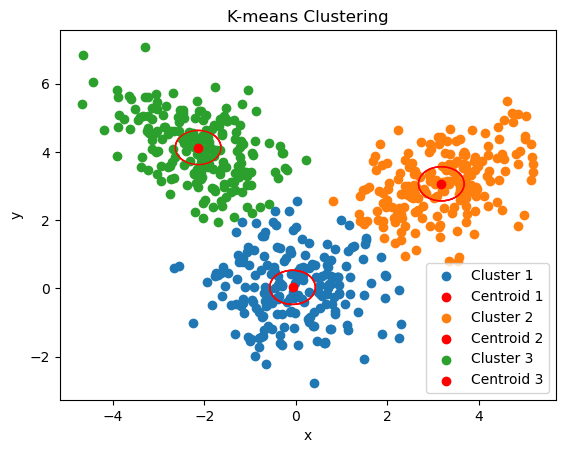

In [18]:
# Evaluation Cell

# Load the data from the file
X = load_data('Image.csv')
# Set the value of K
K = 3
# Cluster the data using K-means
M, U = kmeans(X, K)
# Plot the data and the centroids
plot_clusters(X, M, U)

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``

as you can see the result matches a the underlying distributions abd we can see that this data set contains three distinct distributions
- Advantages:  simplicity, scalability to large datasets, and efficiency. It is also effective at identifying spherical clusters when the underlying data has such a structure. Additionally
- disadvantages : It assumes that clusters are spherical and equally sized, which may not always reflect the underlying data distribution. It is also sensitive to the initial choice of cluster centroids and may not perform well with non-linear or irregularly shaped clusters. Furthermore, it does not work well with clusters of varying densities.

- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

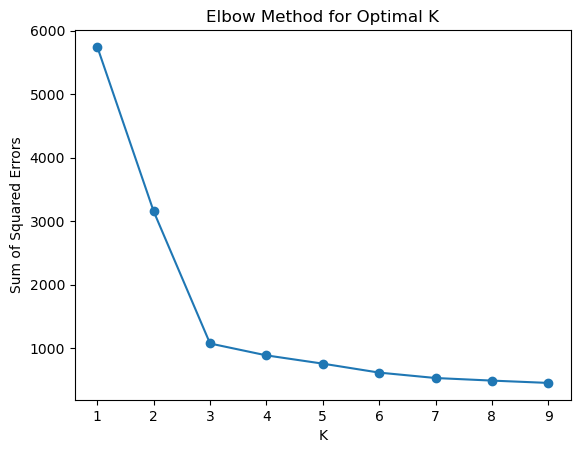

array([5744.40265041, 3151.95779362, 1070.76158904,  883.52811903,
        753.252916  ,  612.01163521,  526.84674397,  486.06484479,
        449.42642609])

In [27]:
def elbow_method(X, K_list):
    S = []
    for K in K_list:
        _, U = kmeans(X, K)
        cluster_centroids = np.array([X[U == k].mean(axis=0) for k in range(K)])
        squared_errors = np.linalg.norm(X - cluster_centroids[U], axis=1) ** 2
        total_squared_error = np.sum(squared_errors)
        S.append(total_squared_error)

    plt.figure()
    plt.plot(K_list, S, marker='o')
    plt.xlabel('K')
    plt.ylabel('Sum of Squared Errors')
    plt.title('Elbow Method for Optimal K')
    plt.show()

    return np.array(S)

# the rest of the code...
elbow_method(X, list(range(1,10)))

the more cluster we will have the better will our error be and that natural for every clustering method 

but having large number of cluster isn't a point (in a trivial case of K=N we will have error=0) and we have to choose a value that with lesser K that minimizes the loss but K is still low 

The point where this bending or leveling off occurs is known as the "elbow" point

here K = 3 seems a reasonable choice 

# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [2]:
# TODO: First 25 rows of the dataset
dataset = pd.read_csv('sentiment.csv')
dataset.head(25)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [3]:
# TODO: Last 10 rows of the dataset
dataset.tail(10)

,PhraseId,SentenceId,Phrase,Sentiment
9990,9991,419,this a comedy or serious drama,2
9991,9992,419,a comedy or serious drama,2
9992,9993,419,a comedy or,2
9993,9994,419,a comedy,2
9994,9995,419,serious drama,2
9995,9996,420,plays like some corny television production fr...,1
9996,9997,420,plays like some corny television,1
9997,9998,420,like some corny television,2
9998,9999,420,some corny television,1
9999,10000,420,corny television,1


In [4]:
# TODO: information of columns 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    10000 non-null  int64 
 1   SentenceId  10000 non-null  int64 
 2   Phrase      10000 non-null  object
 3   Sentiment   10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


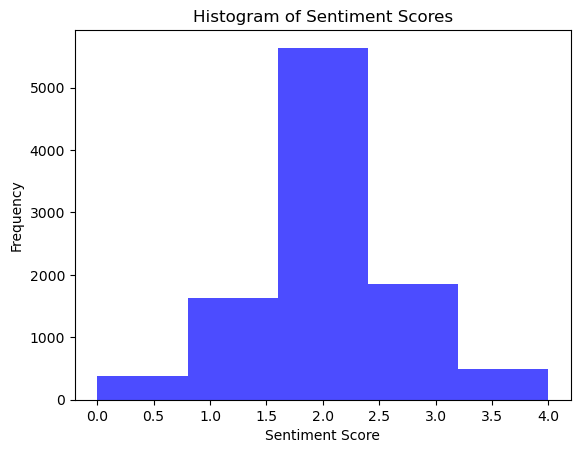

In [5]:
# TODO: histogram of sentiment scores
plt.hist(dataset['Sentiment'], bins=5, alpha=0.7, color='blue')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores')
plt.show()

Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [ ]:

nltk.download('punkt')
nltk.download('stopwords')

In [20]:
import string
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub('['+string.punctuation+']', '', text)  # Remove punctuation
    # text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    stop_words = set(stopwords.words('english'))  # Create a set of English stop words
    word_tokens = word_tokenize(text)  # Tokenize the text
    filtered_tokens = [word for word in word_tokens if word not in stop_words]  # Remove stop words
    text = ' '.join(filtered_tokens)  # Join the filtered tokens back into a single text
    return text

# Apply the function to the 'Phrase' column of the dataset dataframe
dataset['Phrase'] = dataset['Phrase'].apply(preprocess_text)


In [21]:
dataset.head()

,PhraseId,SentenceId,Phrase,Sentiment,preprocessed_text
0,1,1,series escapades demonstrating adage good goos...,1,series escapades demonstrating adage good goos...
1,2,1,series escapades demonstrating adage good goose,2,series escapades demonstrating adage good goose
2,3,1,series,2,series
3,4,1,,2,
4,5,1,series,2,series


### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

## <font color="red"> TODO : discuss BoW method </font>

...

The Bag-of-Words (BoW) technique is a commonly used method in natural language processing for text analysis and feature extraction. This technique represents text data as a bag of individual words, disregarding grammar and word order, and only considering the frequency of words in the text. The goal is to convert text data into numerical features that can be used in machine learning algorithms.

In the Bag-of-Words technique, a corpus of text is first tokenized into individual words, then a vocabulary is created by unique words across all documents in the corpus. After that, each document is represented as a vector of word counts, with each element of the vector corresponding to the frequency of a word in the vocabulary within the document.

In Python, the CountVectorizer class from the sklearn.feature_extraction.text module can be used to implement the Bag-of-Words technique. This class provides a straightforward way to tokenize text, build a vocabulary, and transform text data into a matrix of word counts.

In [22]:
# TODO: Extract features from the preprocessed text data
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the vectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(dataset['Phrase'])

# X is now the feature matrix with the Bag-of-Words representation of the text data


In [15]:
feature_names = vectorizer.get_feature_names_out()

# Print the feature names and the feature matrix
print("Feature names:")
print(feature_names)
print("\nFeature matrix:")
print(X.toarray())

Feature names:
['10' '100' '100minute' ... 'zhuangzhuang' 'zingers' 'zip']

Feature matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


n the above example, the fit method is used to create the vocabulary, and the transform method is used to transform the text data into the matrix of word counts. The resulting matrix X contains the extracted features using the Bag-of-Words technique.

By using the Bag-of-Words approach, the text data is transformed into a format suitable for machine learning algorithms, allowing for the application of various statistical and machine learning techniques for text analysis and classification.

### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE) 

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [17]:
# TODO: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, dataset['Sentiment'], test_size=0.2, random_state=42)


# TODO: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# TODO: Make predictions on the testing set
y_pred = model.predict(X_test)

# TODO: Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.412441203186934


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

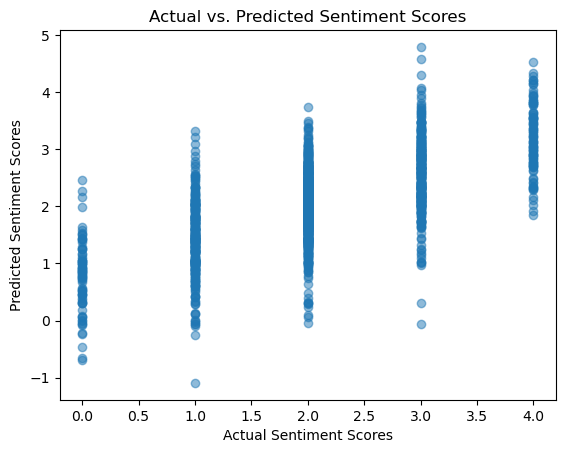

In [51]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Sentiment Scores')
plt.ylabel('Predicted Sentiment Scores')
plt.title('Actual vs. Predicted Sentiment Scores')
plt.show()

## <font color="red"> Discuss the resulted figure </font>

...

. Ideally, the points would form a diagonal line (y=x), indicating perfect predictions. If the points deviate from this line, it suggests that the model's predictions are either overestimating or underestimating the actual sentiment scores.

it would have been better if we had discetized y_pred and then compered it with y_test

In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``

In [23]:
import numpy as np


vocab = set()
for text in dataset['Phrase']:
    words = text.split()
    vocab.update(words)


word_to_index = {word: i for i, word in enumerate(vocab)}


num_docs = len(dataset)
num_words = len(vocab)
feature_matrix = np.zeros((num_docs, num_words))


for i, text in enumerate(dataset['Phrase']):
    words = text.split()
    for word in words:
        if word in word_to_index:
            j = word_to_index[word]
            feature_matrix[i, j] += 1
print(vocab)
print(feature_matrix)

{'pulpiness', 'spears', 'garth', 'drama', 'children', 'unimaginative', 'kong', 'cliche', 'wo', 'mark', 'gifford', 'traveler', 'cross', 'linking', 'white', 'wear', 'everyone', 'help', 'strangeness', 'review', 'reno', 'screenplay', 'tool', 'joyless', 'guide', 'sounding', 'viewing', 'overexposed', 'hellish', 'routine', 'trembling', 'territory', 'clad', 'imax', 'pedigree', 'labours', 'quicksand', 'swimfan', 'endure', 'utterly', 'computer', 'town', 'threetoone', 'fire', 'itch', 'pervasive', 'romanticcomedy', 'growing', 'inspired', 'bilingual', 'lifechanging', 'compressed', 'accents', 'leigh', 'aggressive', 'childhood', 'favors', 'make', 'succeed', 'stylized', 'swallow', 'distort', 'path', 'singlehandedly', 'department', 'aware', 'romantics', 'staring', 'james', 'view', 'likes', 'bottom', 'emotion', 'flash', 'foreign', 'prose', 'natural', 'wiseman', 'familiar', 'gambles', 'goose', 'cause', 'solid', 'occasionally', 'lrb', 'murder', 'improved', 'size', 'schematic', 'director', 'omits', 'quiet'